In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [ ]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [ ]:
x = breast_cancer.data
y = breast_cancer.target

In [ ]:
print(x)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [ ]:
print(x.shape, y.shape)  ## it shows that there are- 
                         ## 569 rows i.e; 569 sample and 30 columns i.e; 30 features.

(569, 30) (569,)


In [ ]:
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [ ]:
data['class'] = breast_cancer.target

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
data.shape

(569, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
print(data['class'].count())
print(data['class'].value_counts())  ## 1 means 'malignant'(i.e; with cancer).

569
1    357
0    212
Name: class, dtype: int64


In [ ]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [ ]:
x = data.drop('class', axis = 1)
y = data['class']

In [ ]:
print(type(x), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

** I want to divide the data in such a way that the mean of the  train and test data as same mean of the original data. that is not in a arbitary way but in such a way that the ratio of the mean of original data, train data and test data are close of each other.*

In [ ]:
#######  Train-Test splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y,test_size = 0.3, random_state = 1)

In [ ]:
print(x.mean(), x_train.mean(), x_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

In [ ]:
print(y.mean(), y_train.mean(), y_test.mean())

0.6274165202108963 0.628140703517588 0.6257309941520468


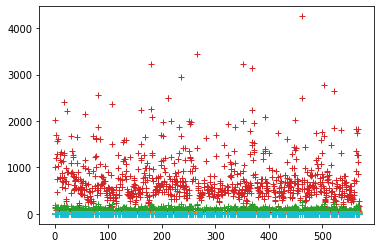

In [ ]:
## for training data....
plt.plot(x_train, '+')
plt.show()

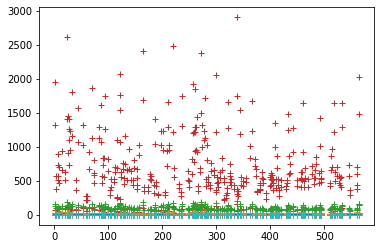

In [ ]:
## for testing data
plt.plot(x_test, '+')
plt.show()

# breast cancer- KNN

In [ ]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(x_train, y_train)
predict = model.predict(x_test)

In [ ]:
accuracy=model.score(x_train,y_train)
print(accuracy)   

0.9422110552763819


In [ ]:
y_pred = model.predict(x_test)
accuracy_test = accuracy_score(y_pred, y_test)
print(accuracy_test)        

0.9415204678362573


In [ ]:
model.score(x_test,y_test)

0.9415204678362573

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

[0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1
 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0]


In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test,model.predict(x_test) ))

Train set Accuracy:  0.9422110552763819
Test set Accuracy:  0.9415204678362573


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 59   5]
 [  5 102]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        64
           1       0.95      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



## After standard scaling- KNN

In [ ]:
breast_cancer1 = sklearn.datasets.load_breast_cancer()

In [ ]:
x = breast_cancer1.data
y = breast_cancer1.target

In [ ]:
data1 = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [ ]:
data1['class'] = breast_cancer.target

In [ ]:
data1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
x = data.drop('class', axis = 1)
y = data['class']

In [ ]:
print(x)
print(type(x), type(y))

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]
<class 'pandas.core.frame.DataFrame'> <class 'panda

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y,test_size = 0.3, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
print(x_train)

[[ 0.26448961 -0.88600705  0.23846573 ...  0.31987464  0.04600391
  -0.06257918]
 [-1.01123924 -0.01880878 -0.98672901 ... -1.25580555 -0.15685449
  -0.51376394]
 [-0.96598056  1.34163718 -0.96225774 ... -0.81928245  0.76710211
  -0.1823381 ]
 ...
 [-0.75100187 -1.96197527 -0.74487133 ... -0.39927967  0.14426344
   0.02710076]
 [-0.0098911   0.43084958 -0.07395077 ... -0.54736711 -1.10775321
  -0.47755775]
 [ 1.44970111 -0.78735751  1.41512579 ...  0.91222442 -0.76384484
  -1.23844465]]


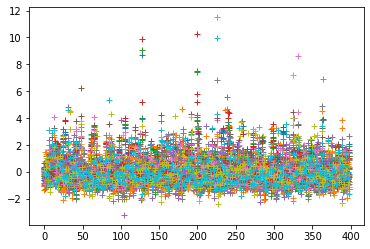

In [ ]:
## for training data....
plt.plot(x_train, '+')
plt.show()

In [ ]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(x_train, y_train)
predict = model.predict(x_test)

In [ ]:
accuracy=model.score(x_train,y_train)
print(accuracy)  

0.9748743718592965


In [ ]:
y_pred = model.predict(x_test)
accuracy_test = accuracy_score(y_pred, y_test)
print(accuracy_test)   

0.9649122807017544


In [ ]:
model.score(x_test,y_test)

0.9649122807017544

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test,model.predict(x_test) ))

Train set Accuracy:  0.9748743718592965
Test set Accuracy:  0.9649122807017544


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 59   5]
 [  1 106]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        64
           1       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



# SVM for Breast Cancer Dataset. with scaling.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y,test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[ 0.05563811  0.89626203  0.12598506 ...  0.92395547  3.51208834
   3.16267643]
 [ 1.27666753 -0.18552085  1.23829341 ...  0.72724847  1.20540467
   0.05133297]
 [-0.18050438  0.28481953 -0.1124559  ...  1.34611894  1.03291303
   1.37977769]
 ...
 [-0.72190422 -1.02978185 -0.72707596 ... -0.30349618 -0.41131243
  -0.35603558]
 [-0.53183831 -1.22967651 -0.58642492 ... -1.47708037 -0.99307969
  -1.2935123 ]
 [ 1.48689193 -0.79225995  1.45467962 ...  0.93152112 -0.75786382
  -1.18029559]]


In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', random_state = 0)   #### with kernel as linear function....
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = svclassifier.predict(x_test)

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, svclassifier.predict(x_train)))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.9868131868131869
Testing Accuracy: 0.9912280701754386


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[41  1]
 [ 0 72]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



** changes in the kernel

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', random_state = 0)    ###########    with radial basis function...
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = svclassifier.predict(x_test)
y_pred[0:5]

array([1, 0, 1, 1, 0])

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, svclassifier.predict(x_train)))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.989010989010989
Testing Accuracy: 0.9824561403508771


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[40  2]
 [ 0 72]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.metrics import precision_score
print("Precision score ".format(round(precision_score(y_test, y_pred),3)))


Precision score 0.973%


In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score:'.format(
      average_precision))

Average precision-recall score: 0.97


# mlp for breast cancer

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y,test_size = 0.3, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(activation='relu',solver='adam', batch_size=50,alpha=1e-5,hidden_layer_sizes=(150,140,130),
random_state=0,learning_rate='adaptive')

In [ ]:
clf.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size=50, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 140, 130), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n","Confusion matrix\n", cm)


 Confusion matrix
 [[ 59   5]
 [  0 107]]


In [ ]:
print("Classification report\n",metrics.classification_report(y_test, y_pred))
print("Accuracy of the model : ",metrics.accuracy_score(y_test, y_pred)*100)

Classification report
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        64
           1       0.96      1.00      0.98       107

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy of the model :  97.07602339181285


In [ ]:
######  Changing the activation function.....

clf = MLPClassifier(activation='logistic',solver='adam', batch_size=50,alpha=1e-5,hidden_layer_sizes=(150,140,130),
random_state=0,learning_rate='adaptive')

In [ ]:
clf.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size=50, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 140, 130), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n","Confusion matrix\n", cm)


 Confusion matrix
 [[ 58   6]
 [  2 105]]


In [ ]:
print("Classification report\n",metrics.classification_report(y_test, y_pred))
print("Accuracy of the model : ",metrics.accuracy_score(y_test, y_pred)*100)

Classification report
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        64
           1       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Accuracy of the model :  95.32163742690058
